In [13]:
import math
import pygad
import numpy as np
import matplotlib.pyplot as plt

up - 1, down - 2, right - 3, left - 4

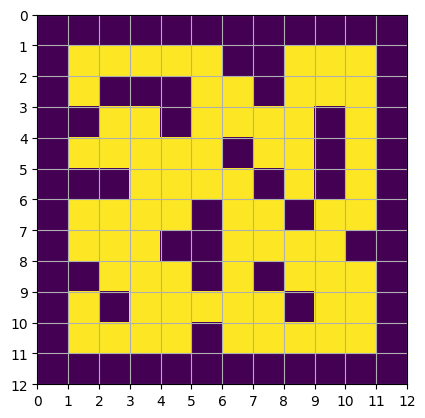

In [104]:
labirynth = np.zeros(shape=(12, 12), dtype=int)
labirynth[0, :] = -1; labirynth[:, 0] = -1; labirynth[11, :] = -1; labirynth[:, 11] = -1
labirynth[1, 6] = -1; labirynth[1, 7] = -1
labirynth[2, 2] = -1; labirynth[2, 3] = -1; labirynth[2, 4] = -1; labirynth[2, 7] = -1
labirynth[3, 1] = -1; labirynth[3, 4] = -1; labirynth[3, 9] = -1
labirynth[4, 6] = -1; labirynth[4, 8]; labirynth[4, 9] = -1
labirynth[5, 1] = -1; labirynth[5, 2] = -1; labirynth[5, 7] = -1; labirynth[5, 9] = -1
labirynth[6, 8] = -1; labirynth[6, 5] = -1; 
labirynth[7, 3]; labirynth[7, 4] = -1; labirynth[7, 5] = -1; labirynth[7, 10] = -1
labirynth[8, 1] = -1; labirynth[8, 5] = -1; labirynth[8, 7] = -1
labirynth[9, 2] = -1; labirynth[9, 6]; labirynth[9, 8] = -1
labirynth[10, 5] = -1

plt.imshow(labirynth, interpolation='nearest')
plt.xticks(ticks=np.arange(-0.5,12,1), labels=np.arange(0,13,1))
plt.yticks(ticks=np.arange(-0.5,12,1), labels=np.arange(0,13,1))
plt.grid()
# [3. 3. 4. 3. 3. 3. 2. 2. 2. 2. 3. 2. 3. 2. 1. 2. 1. 4. 3. 2. 3. 3. 2. 1. 2. 2. 2. 3. 4. 3.] - 28 steps

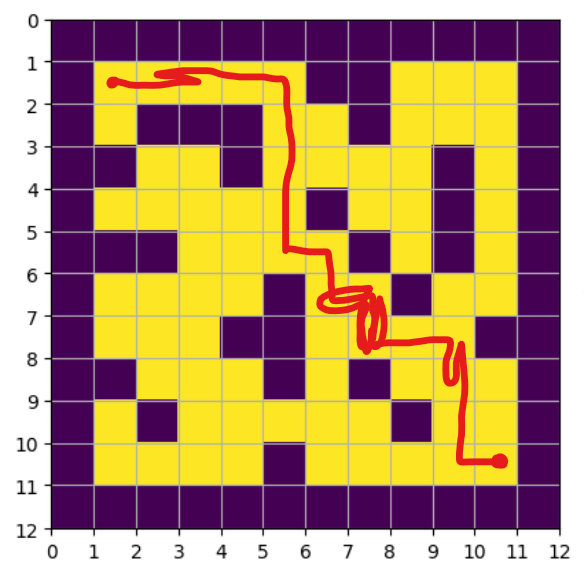

In [87]:
gene_space = [1, 2, 3, 4]

def fitness_func(solution, solution_idx): # penalty - optional
    penalty = 0.0
    x_coord = y_coord =  1
    for num in solution:
        if x_coord == 11 and y_coord == 11:
            return -penalty
        
        x_tmp = x_coord
        y_tmp = y_coord
        if num == 1:
            x_tmp -= 1
        elif num == 2:
            x_tmp += 1
        elif num == 3:
            y_tmp += 1
        elif num == 4:
            y_tmp -= 1

        if labirynth[x_tmp, y_tmp] == 0:
            x_coord, y_coord = x_tmp, y_tmp
        else:
            penalty += 0.5

    return -(20-x_coord-y_coord) - penalty


Parameters of the best solution : [3. 3. 4. 3. 3. 3. 2. 2. 2. 2. 3. 2. 3. 2. 1. 2. 1. 4. 3. 2. 3. 3. 2. 1.
 2. 2. 2. 3. 4. 3.]
Fitness value of the best solution = 0.0


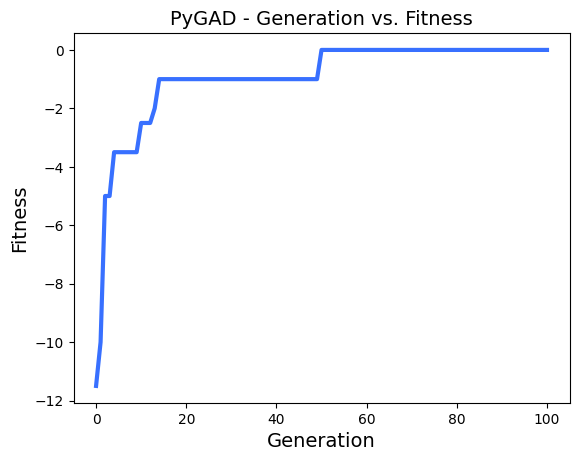

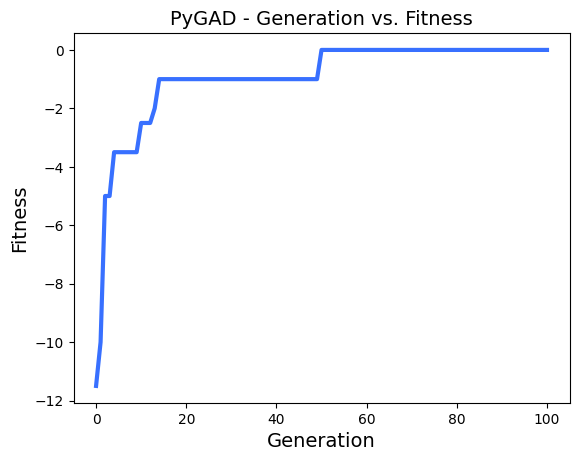

In [88]:
fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 300
num_genes = 30 

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 150
num_generations = 100
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 4


#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

In [107]:
import time
fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 300
num_genes = 30

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 150
num_generations = 100
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 4

times = []
for _ in range(10):
    start = time.time()
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_0.0"])

    #uruchomienie algorytmu
    ga_instance.run()
    end = time.time()
    times.append(end - start)
print(f"Average time to find the solution: {sum(times) / 10}")

# #podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
# solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print("Parameters of the best solution : {solution}".format(solution=solution))
# print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# #tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# # solution = np.array(solution, dtype=int)
# best_items = [items_to_ints[inx] for inx in range(11) if solution[inx] == 1]
# print(f"Chosen items: {best_items}")

# #wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
# ga_instance.plot_fitness()
# print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

Average time to find the solution: 1.9296326875686645
